# Kaggle-coronavirus-visualisation part1 - update version
* Today's goal
    * EDA 20.01.21 ~ 20.01.31
        * Visualization
            * Increasing number of confirmed patients and Increasing number of death.
            * Find more...

## 01. Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2019_nCoV_20200121_20200131.csv')
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN


In [3]:
data.head(20)

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
5,Jiangxi,Mainland China,1/31/2020 19:00,240.0,NaN,7.0,NaN
6,Chongqing,Mainland China,1/31/2020 19:00,238.0,NaN,1.0,1.0
7,Anhui,Mainland China,1/31/2020 19:00,237.0,NaN,3.0,NaN
8,Shandong,Mainland China,1/31/2020 19:00,184.0,NaN,2.0,NaN
9,Sichuan,Mainland China,1/31/2020 19:00,177.0,NaN,1.0,1.0


In [6]:
latest_day = data[data['Last Update'] == '1/31/2020 19:00']
latest_day

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
...,...,...,...,...,...,...,...
58,NaN,Italy,1/31/2020 19:00,2.0,NaN,NaN,NaN
59,NaN,Sweden,1/31/2020 19:00,1.0,NaN,NaN,NaN
60,NaN,Russia,1/31/2020 19:00,2.0,NaN,NaN,NaN
61,NaN,Spain,1/31/2020 19:00,1.0,NaN,NaN,NaN


이 데이터로 어떤 재미있는 분석을 해볼 수 있을까?

In [10]:
latest_day[latest_day['Province/State'].isnull() == False]

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
5,Jiangxi,Mainland China,1/31/2020 19:00,240.0,NaN,7.0,NaN
6,Chongqing,Mainland China,1/31/2020 19:00,238.0,NaN,1.0,1.0
7,Anhui,Mainland China,1/31/2020 19:00,237.0,NaN,3.0,NaN
8,Shandong,Mainland China,1/31/2020 19:00,184.0,NaN,2.0,NaN
9,Sichuan,Mainland China,1/31/2020 19:00,177.0,NaN,1.0,1.0


### 중국 내 자치구 별로 확진자와 사망자는 어떨까?

In [16]:
latest_china_province = latest_day[(latest_day['Province/State'].isnull() == False) | (latest_day['Country/Region'] == 'Mainland China')]
latest_china_province

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/31/2020 19:00,7153.0,NaN,169.0,249.0
1,Zhejiang,Mainland China,1/31/2020 19:00,537.0,NaN,14.0,NaN
2,Guangdong,Mainland China,1/31/2020 19:00,436.0,NaN,10.0,NaN
3,Henan,Mainland China,1/31/2020 19:00,352.0,NaN,3.0,2.0
4,Hunan,Mainland China,1/31/2020 19:00,332.0,NaN,3.0,NaN
5,Jiangxi,Mainland China,1/31/2020 19:00,240.0,NaN,7.0,NaN
6,Chongqing,Mainland China,1/31/2020 19:00,238.0,NaN,1.0,1.0
7,Anhui,Mainland China,1/31/2020 19:00,237.0,NaN,3.0,NaN
8,Shandong,Mainland China,1/31/2020 19:00,184.0,NaN,2.0,NaN
9,Sichuan,Mainland China,1/31/2020 19:00,177.0,NaN,1.0,1.0


* china에서 사망자 수와 확진자 수를 plot로 그려보자!

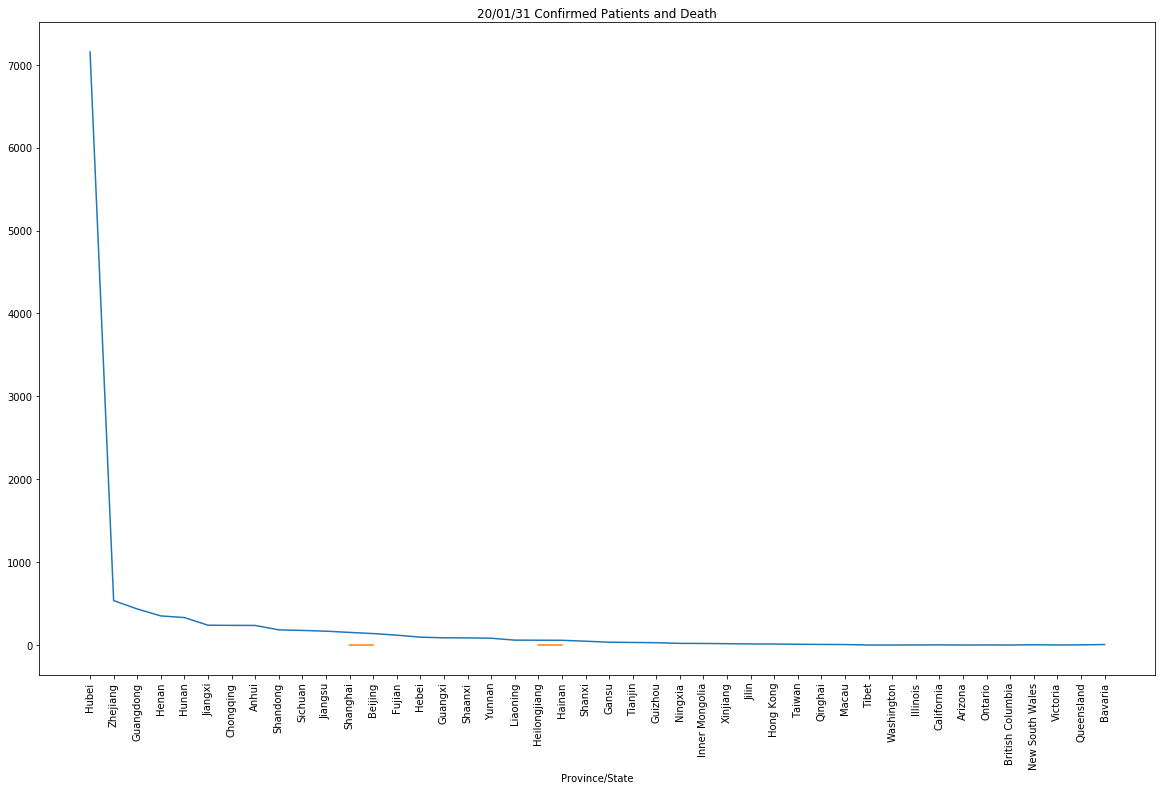

In [18]:

plt.figure(figsize=(20, 12))
plt.plot(latest_china_province['Province/State'], latest_china_province['Confirmed'])
plt.plot(latest_china_province['Province/State'], latest_china_province['Death'])
plt.title("20/01/31 Confirmed Patients and Death")
plt.xlabel("Province/State")
plt.xticks(rotation=90)
plt.show()


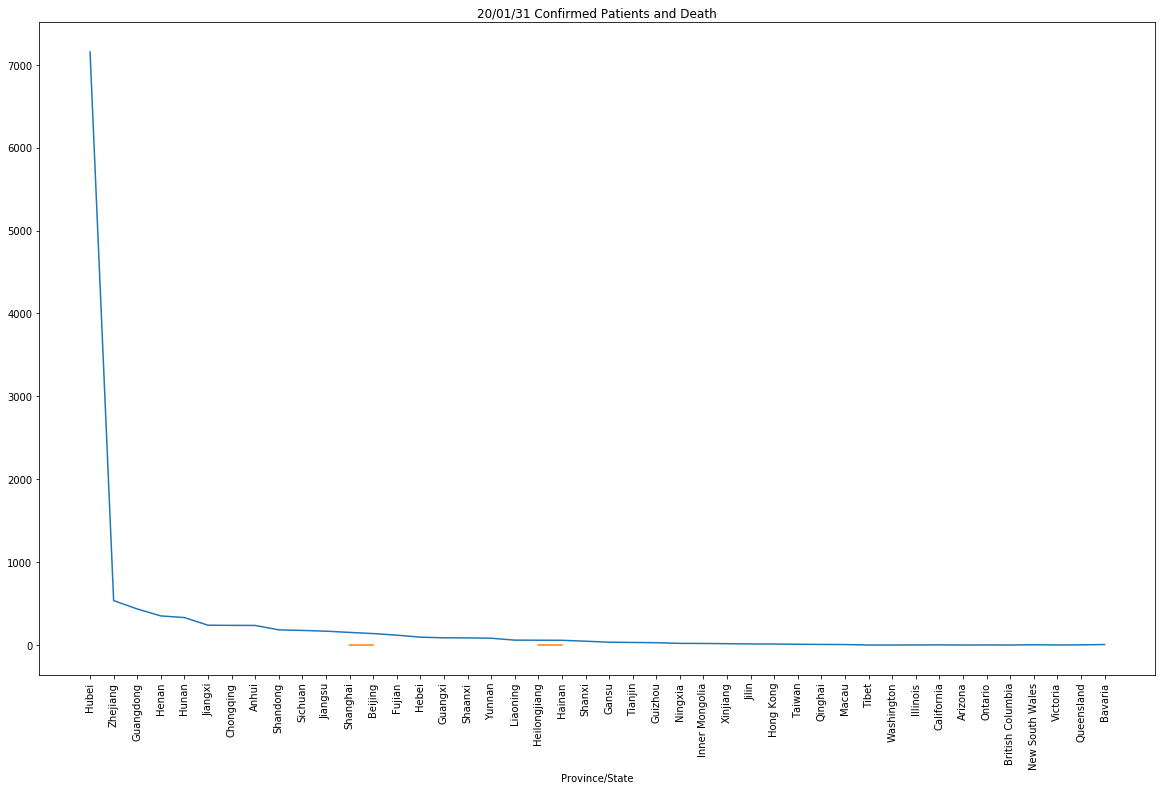

In [19]:

plt.figure(figsize=(20, 12))
plt.plot(latest_china_province['Province/State'], latest_china_province['Confirmed'])
plt.plot(latest_china_province['Province/State'], latest_china_province['Death'])
plt.title("20/01/31 Confirmed Patients and Death")
plt.xlabel("Province/State")
plt.xticks(rotation=90)
plt.show()
